In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
import pandas as pd

# Use raw string for path safety
df = pd.read_excel(r"C:\Users\joyasree paul\Downloads\IMDB Movies India.csv.xlsx")

# Inspect data
df.index = np.arange(1, len(df) + 1)
df.info()
df.head(20)


<class 'pandas.core.frame.DataFrame'>
Index: 15509 entries, 1 to 15509
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.3+ MB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
6,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
7,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
9,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
10,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [3]:
# Example: drop rows with missing target
df = df[df['Rating'].notnull()].reset_index(drop=True)
print(df.shape)

(7919, 10)


In [12]:
import pandas as pd
import numpy as np

# Step 1: Load dataset
df = pd.read_excel(r"C:\Users\joyasree paul\Downloads\IMDB Movies India.csv.xlsx")
df.columns = df.columns.str.strip()

# Step 2: Clean Duration column (robustly)
df['Duration'] = df['Duration'].astype(str).str.extract(r'(\d+)').astype(float)
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

# Step 3: Drop rows where Rating is missing
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

# Step 4: Fill missing year (numeric) with median
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'] = df['Year'].fillna(df['Year'].median())

# Step 5: Fill missing Votes with 0
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].fillna(0)

# Step 6: Fill missing categorical columns
for col in ['Genre', 'Director', 'Actor 1']:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# Step 7: Convert genres to list
df['Genre'] = df['Genre'].apply(
    lambda x: [i.strip() for i in str(x).split(',')] if x not in [None, np.nan, ''] else []
)

# Step 8: Extract unique genres and create binary columns
genres_list = sorted(set(g for sublist in df['Genre'] for g in sublist if g != ''))
for genre in genres_list:
    df['Genre_' + genre] = df['Genre'].apply(lambda x: int(genre in x))

# Step 9: Encode top 10 directors
top_directors = df['Director'].value_counts().nlargest(10).index
df['Director'] = df['Director'].apply(lambda x: x if x in top_directors else 'Other')
director_enc = pd.get_dummies(df['Director'], prefix='Director')

# Step 10: Encode top 10 Actor 1
top_actors = df['Actor 1'].value_counts().nlargest(10).index
df['Actor1'] = df['Actor 1'].apply(lambda x: x if x in top_actors else 'Other')
actor_enc = pd.get_dummies(df['Actor1'], prefix='Actor1')

# Step 11: Concatenate encoded columns
df = pd.concat([df, director_enc, actor_enc], axis=1)

# Step 12: Select features and target
features = (
    ['Year', 'Duration', 'Votes'] +
    [col for col in df.columns if col.startswith('Genre_')] +
    [col for col in df.columns if col.startswith('Director_')] +
    [col for col in df.columns if col.startswith('Actor1_')]
)

X = df[features]
y = df['Rating']

print(X.head())
print(y.head())


     Year  Duration  Votes  Genre_Action  Genre_Adventure  Genre_Animation  \
1 -2019.0     109.0      8             0                0                0   
3 -2019.0     110.0     35             0                0                0   
5 -1997.0     147.0    827             0                0                0   
6 -2005.0     142.0   1086             0                0                0   
8 -2012.0      82.0    326             0                0                0   

   Genre_Biography  Genre_Comedy  Genre_Crime  Genre_Documentary  ...  \
1                0             0            0                  0  ...   
3                0             1            0                  0  ...   
5                0             1            0                  0  ...   
6                0             0            0                  0  ...   
8                0             0            0                  0  ...   

   Actor1_Amitabh Bachchan  Actor1_Ashok Kumar  Actor1_Dev Anand  \
1                    Fal

In [13]:
# Assuming director_enc and actor_enc are defined as above and concatenated previously
feature_cols = ['Year', 'Duration', 'Votes'] + \
               [col for col in df.columns if col.startswith('Genre_')] + \
               list(director_enc.columns) + \
               list(actor_enc.columns)

X = df[feature_cols]
y = df['Rating']

X.head()



,Year,Duration,Votes,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Actor1_Amitabh Bachchan,Actor1_Ashok Kumar,Actor1_Dev Anand,Actor1_Dharmendra,Actor1_Jeetendra,Actor1_Mithun Chakraborty,Actor1_Other,Actor1_Rajesh Khanna,Actor1_Shashi Kapoor,Actor1_Unknown
1,-2019.0,109.0,8,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,-2019.0,110.0,35,0,0,0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
5,-1997.0,147.0,827,0,0,0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
6,-2005.0,142.0,1086,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
8,-2012.0,82.0,326,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False


In [18]:
# Assuming X is defined as in your cleaned data
numeric_features = ['Year', 'Duration', 'Votes']

# Categorical features: typically columns starting with 'Genre_', 'Director_', 'Actor1_'
categorical_features = [col for col in X.columns if col.startswith('Genre_') or col.startswith('Director_') or col.startswith('Actor1_')]

# Now create the transformers (after importing the required modules)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
print(X.dtypes)

    




Year                             float64
Duration                         float64
Votes                              int64
Genre_Action                       int64
Genre_Adventure                    int64
Genre_Animation                    int64
Genre_Biography                    int64
Genre_Comedy                       int64
Genre_Crime                        int64
Genre_Documentary                  int64
Genre_Drama                        int64
Genre_Family                       int64
Genre_Fantasy                      int64
Genre_History                      int64
Genre_Horror                       int64
Genre_Music                        int64
Genre_Musical                      int64
Genre_Mystery                      int64
Genre_News                         int64
Genre_Romance                      int64
Genre_Sci-Fi                       int64
Genre_Sport                        int64
Genre_Thriller                     int64
Genre_Unknown                      int64
Genre_War       

In [21]:
# 1️⃣ Define numeric columns
numeric_features = ['Year', 'Duration', 'Votes']

# 2️⃣ Define categorical columns
categorical_features = [
    col for col in df.columns 
    if col.startswith('Genre_') or col.startswith('Director_') or col.startswith('Actor1_')
]

# 3️⃣ Now create X and y
X = df[numeric_features + categorical_features]
y = df['Rating']
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)



Numeric features: ['Year', 'Duration', 'Votes']
Categorical features: ['Genre_Action', 'Genre_Adventure', 'Genre_Animation', 'Genre_Biography', 'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary', 'Genre_Drama', 'Genre_Family', 'Genre_Fantasy', 'Genre_History', 'Genre_Horror', 'Genre_Music', 'Genre_Musical', 'Genre_Mystery', 'Genre_News', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Sport', 'Genre_Thriller', 'Genre_Unknown', 'Genre_War', 'Genre_Western', 'Director_Basu Chatterjee', 'Director_David Dhawan', 'Director_Hrishikesh Mukherjee', 'Director_Kanti Shah', 'Director_Mahesh Bhatt', 'Director_Other', 'Director_Ram Gopal Varma', 'Director_Rama Rao Tatineni', 'Director_Shakti Samanta', 'Director_Shibu Mitra', 'Director_Vikram Bhatt', 'Actor1_Akshay Kumar', 'Actor1_Amitabh Bachchan', 'Actor1_Ashok Kumar', 'Actor1_Dev Anand', 'Actor1_Dharmendra', 'Actor1_Jeetendra', 'Actor1_Mithun Chakraborty', 'Actor1_Other', 'Actor1_Rajesh Khanna', 'Actor1_Shashi Kapoor', 'Actor1_Unknown']


In [22]:
from sklearn.model_selection import train_test_split

# 1️⃣ Create feature matrix and target vector
# If you already have a processed features DataFrame, assign it to df_features
# If not, drop the 'Rating' column from df and use the rest as features
df_features = df.drop(columns=['Rating']) 
y = df['Rating']

# 2️⃣ Remove rows where rating is missing
mask = y.notnull()
X = df_features[mask]
y = y[mask]

# 3️⃣ Convert to numpy arrays (optional but recommended for sklearn)
X = X.values
y = y.values

# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(6335, 55) (1584, 55) (6335,) (1584,)


RMSE: 1.1081605423762293
MAE: 0.8323681878306877
R^2: 0.33947072725308325


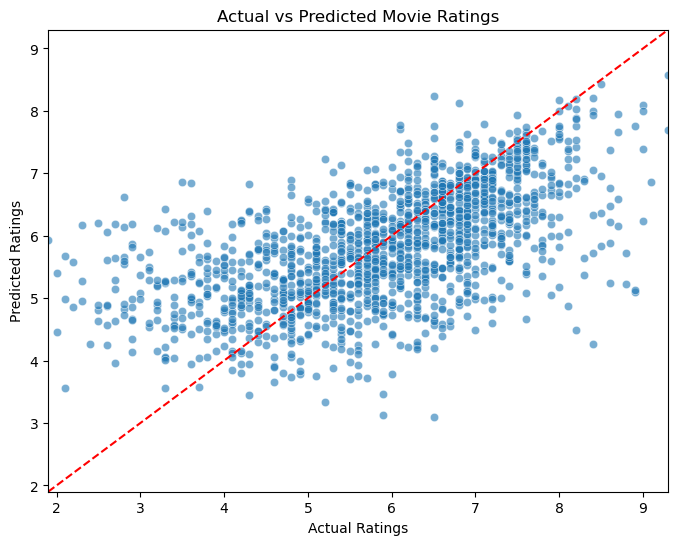

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming df is your preprocessed DataFrame with all features (numeric + dummy categories)
# Define numeric and categorical feature columns BEFORE splitting/transforming
numeric_features = ['Year', 'Duration', 'Votes']
categorical_features = [col for col in df.columns if col.startswith('Genre_') or col.startswith('Director_') or col.startswith('Actor1_')]

# Define your feature matrix X and target y (before train-test split)
X = df[numeric_features + categorical_features]
y = df['Rating']

# Split data (this gives pandas DataFrame and Series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create ColumnTransformer to scale numeric columns only; pass categorical unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ]
)

# Fit and transform train set; transform test set
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Train your model
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Metrics output
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

# Plot results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()


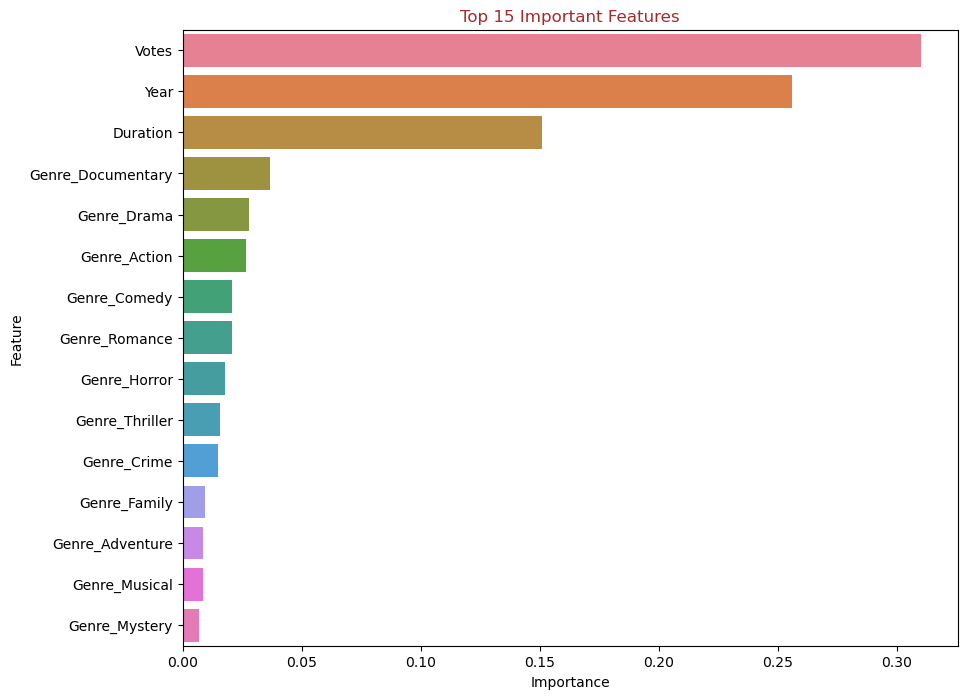

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(10,8))

# Convert index to a DataFrame
df_feats = feat_importances.iloc[:15].reset_index()
df_feats.columns = ['Feature', 'Importance']

# Add a helper hue column (can just use Feature for unique colors)
sns.barplot(
    x='Importance',
    y='Feature',
    hue='Feature',
    data=df_feats,
    palette=sns.color_palette('husl', len(df_feats)),
    dodge=False,
    legend=False  # Hide legend
)
plt.title('Top 15 Important Features', color='brown')
plt.show()

In [27]:
import pandas as pd

# Suppose these are your test results
# y_test: Series or array of actual IMDb ratings (from test set)
# y_pred: Array of predicted ratings (from your model)
# X_test: The test feature set as a DataFrame
# df: The original cleaned DataFrame

# To get movie names for the test set, match the indices
X_test_df = X_test.copy()
X_test_df['Actual_Rating'] = y_test
X_test_df['Predicted_Rating'] = y_pred

# Join original movie names for the test set (assuming index is maintained)
if 'Name' in df.columns:
    X_test_df['Name'] = df.loc[X_test.index, 'Name'].values

# Sort table by actual IMDb rating, descending
result_table = X_test_df.sort_values('Actual_Rating', ascending=False)

# Select final columns for display
display_cols = ['Name', 'Actual_Rating', 'Predicted_Rating']
result_table = result_table[display_cols].head(20)  # Show top 20

# Show table
print(result_table.to_markdown(index=False))
 



| Name                                             |   Actual_Rating |   Predicted_Rating |
|:-------------------------------------------------|----------------:|-------------------:|
| Mahakaleshwar - Legends of Shiva                 |             9.3 |            8.574   |
| Meher                                            |             9.3 |            7.68967 |
| Soorarai Pottru                                  |             9.1 |            6.86    |
| Foresting Life                                   |             9   |            7.397   |
| Mother India                                     |             9   |            6.23367 |
| Borderlands                                      |             9   |            8.087   |
| Moral Nights                                     |             9   |            8.001   |
| Viraat                                           |             8.9 |            5.137   |
| Leaving Home: The Life and Music of Indian Ocean |             8.9 |          

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Random Forest MAE: 0.8293223043931376
Random Forest RMSE: 1.1010843110471844
Random Forest R²: 0.34787949927608053


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],       # number of trees
    'max_depth': [None, 10, 20],           # tree depth
    'min_samples_split': [2, 5, 10]        # minimum samples to split
}

# The RandomForestRegressor does not need standardized features, so you’re all set.
grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,                   # 5-fold cross-validation
    verbose=2,              # print progress as it runs
    n_jobs=-1               # use all CPU cores for speed
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Negative MSE (CV):", grid.best_score_)

best_model = grid.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}
Best Negative MSE (CV): -1.2428445144266758


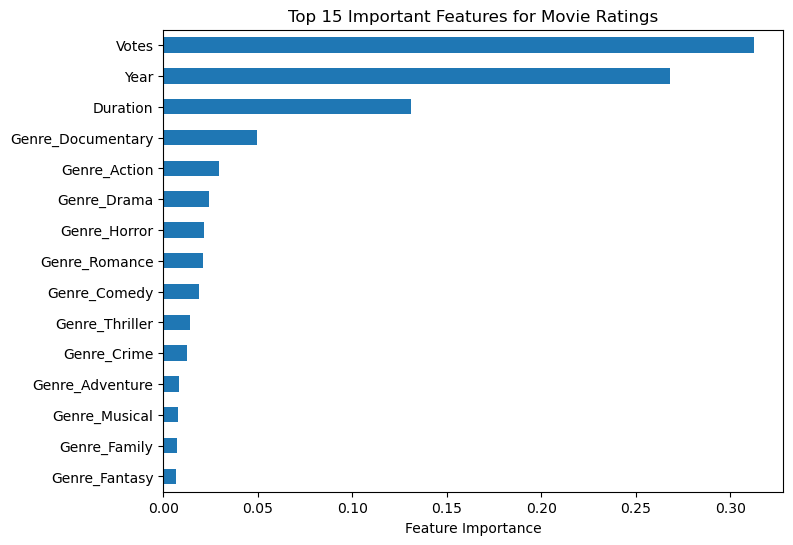

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'best_model' is your trained model,
# and 'X' contains the feature columns used to train the model

feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)

# Sort by importance descending and get top 15
top_features = feature_importance.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(8,6))
top_features.plot(kind='barh')
plt.title("Top 15 Important Features for Movie Ratings")
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.show()



In [43]:
import pandas as pd

# Get the exact column names from the training data features DataFrame (e.g., X)
feature_columns = list(X.columns)

# 1. Start with a dict of ALL zeros with exactly the same columns
new_movie_dict = {col: [0] for col in feature_columns}

# 2. Update with scaled/encoded values for the new movie
#    IMPORTANT: These values must already be preprocessed using the SAME scaler/encoder you used in training
#    Example values (replace with the correct scaled values):
new_movie_dict['Duration'] = [0.42]       # scaled numeric
new_movie_dict['Votes'] = [-0.10]         # scaled numeric
new_movie_dict['Genre_Action'] = [1]      # one-hot encoded

# 3. Convert to DataFrame with the correct column order
new_movie_df = pd.DataFrame(new_movie_dict)[feature_columns]

# 4. Predict with your trained model
predicted_rating = best_model.predict(new_movie_df)
print("Predicted Rating:", predicted_rating[0])



Predicted Rating: 4.090189986999573


In [44]:
# Example: Predict for a new movie
new_movie_dict = {col: [0] for col in feature_cols}
new_movie_dict['Year'] = [2024]
new_movie_dict['Duration'] = [125]
new_movie_dict['Votes'] = [500]
new_movie_dict['Genre_Drama'] = [1]
new_movie_dict['Director_Other'] = [1]
new_movie_dict['Actor1_Other'] = [1]
# add more as needed

new_movie_df_raw = pd.DataFrame(new_movie_dict)[feature_cols]
new_movie_scaled = preprocessor.transform(new_movie_df_raw)
pred_rating = model.predict(new_movie_scaled)
print("Predicted Rating for new movie:", float(pred_rating[0]))

Predicted Rating for new movie: 7.068000000000001
